# Introdução
 
No trabalho a seguir seguirei uma abordagem que costumo aplicar na hora de analisar dados a priori desconhecidos para posteriormente extrair informações que podem ser úteis. Além disso, seguirei uma estrutura mais detalhada, explicando os meus passos e decisões. Com o intuito de facilitar o entendimento de quem lê esse arquivo, tanto em relação ao código quanto às minhas ideias e observações.
 
###**Passos:**
 
1. Aquisição dos dados
2. Entendimento sobre que dados são esperados em cada coluna
  - Tipo de dado presente em cada coluna
3. Análise da qualidade dos dados
  - Busca por valores faltantes
4. Análise exploratória
  - Ver que tipo de informações estão presentes
  - Estudo dos gráficos e criação de hipóteses
5. Listagem de perguntas a serem respondidas
6. Conclusão dos resultados encontrados
 
 
 
#Bibliotecas utilizadas
1. Processamento de dados em tabelas
  - Pandas
2. Visualização dos dados
  - Seaborn
  - Matplotlib.pyplot
  - Matplotlib.gridspec
3. Tratamento de expressões regulares
  - Re
4. Normalização dos dados
  - sklearn


In [1]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
from sklearn import preprocessing

#1. Aquisição dos dados

In [264]:
#Aquisição de dados presentes em meu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [283]:
#Para essa análise utilizei o csv de amostras cedido pela Alura em seu guithub.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
#fonte2 = "/content/drive/My Drive/Colab Notebooks/Imersão dados Alura - 2020/sample.csv"
#Leitura da url da fonte e armazenamento em um dataframe
dadoCru = pd.read_csv(fonte)#, sep=";", encoding = "utf-16")
#Primeira visualização dos dados
print("Descrição:\n", dadoCru.describe(), "\nQuantidade de linhas na tabela:", len(dadoCru))
dadoCru.head()

Descrição:
        NU_INSCRICAO    NU_ANO  ...  NU_NOTA_REDACAO           Q005
count  1.273800e+05  127380.0  ...     98043.000000  127380.000000
mean   1.900035e+11    2019.0  ...       571.570025       3.864068
std    1.469535e+06       0.0  ...       188.076455       1.475714
min    1.900010e+11    2019.0  ...         0.000000       1.000000
25%    1.900023e+11    2019.0  ...       480.000000       3.000000
50%    1.900035e+11    2019.0  ...       580.000000       4.000000
75%    1.900048e+11    2019.0  ...       680.000000       5.000000
max    1.900061e+11    2019.0  ...      1000.000000      20.000000

[8 rows x 95 columns] 
Quantidade de linhas na tabela: 127380


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


#2. Entendimento sobre que dados são esperados em cada coluna
- [X] Tipo de dado presente em cada coluna

In [284]:
#Uso o dtypes para verificar como o próprio pandas classificou os valores de cada coluna
dadoTypes = pd.DataFrame(dadoCru.dtypes, columns=["Dtype"])
#Em seguida, utilizo a função type() para verificar o tipo dos valores do primeira linha
#da tabela, com o intuito de verificar se os tipos das colunas foram classificados corretamente
dadoTypes["Tipo"] = [re.search("<class '(.*)'>", str(type(x))).group(1) for x in dadoCru.loc[1]]
#Tabela criada e apresentada após ser feita uma transposta, melhora a visualização
print("Tipo dos dados presentes em cada coluna:\n")
dadoTypes.T

Tipo dos dados presentes em cada coluna:



,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
Dtype,int64,int64,int64,object,int64,object,int64,object,int64,int64,int64,float64,object,float64,object,int64,int64,int64,float64,int64,float64,float64,object,float64,object,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,int64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
Tipo,numpy.int64,numpy.int64,numpy.int64,str,numpy.int64,str,numpy.int64,str,numpy.int64,numpy.int64,numpy.int64,numpy.float64,str,numpy.float64,str,numpy.int64,numpy.int64,numpy.int64,numpy.float64,numpy.int64,numpy.float64,numpy.float64,float,numpy.float64,float,numpy.float64,numpy.float64,numpy.float64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,numpy.int64,...,str,str,float,numpy.int64,float,str,str,float,numpy.float64,numpy.float64,numpy.float64,numpy.float64,numpy.float64,numpy.float64,numpy.float64,str,str,str,str,numpy.int64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str


#3. Análise da qualidade dos dados
 - [X] Busca por valores faltantes

In [285]:
#Valores faltantes por coluna encontrados através da aplicação da função isna() conjunta com sum().
#Resultando em uma tabela mostando quantos valores faltantes estão presentes em cada coluna
dfValFaltantes = pd.DataFrame(dadoCru.isna().sum(), columns=["Qt_Nan"]).T
print("Valores faltantes por coluna:\n")
dfValFaltantes

Valores faltantes por coluna:



,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
Qt_Nan,0,0,0,0,0,0,0,0,0,0,0,3623,3623,3623,3623,0,0,0,55402,0,98753,98753,98753,98753,98753,98753,98753,98753,0,0,0,0,0,0,0,0,0,0,0,0,...,29337,29337,34622,0,34622,29337,29337,34622,29337,29337,29337,29337,29337,29337,29337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#4. Análise exploratória
  - [X] Ver que tipo de informações estão presentes
  - [X] Estudo dos gráficos e criação de hipóteses

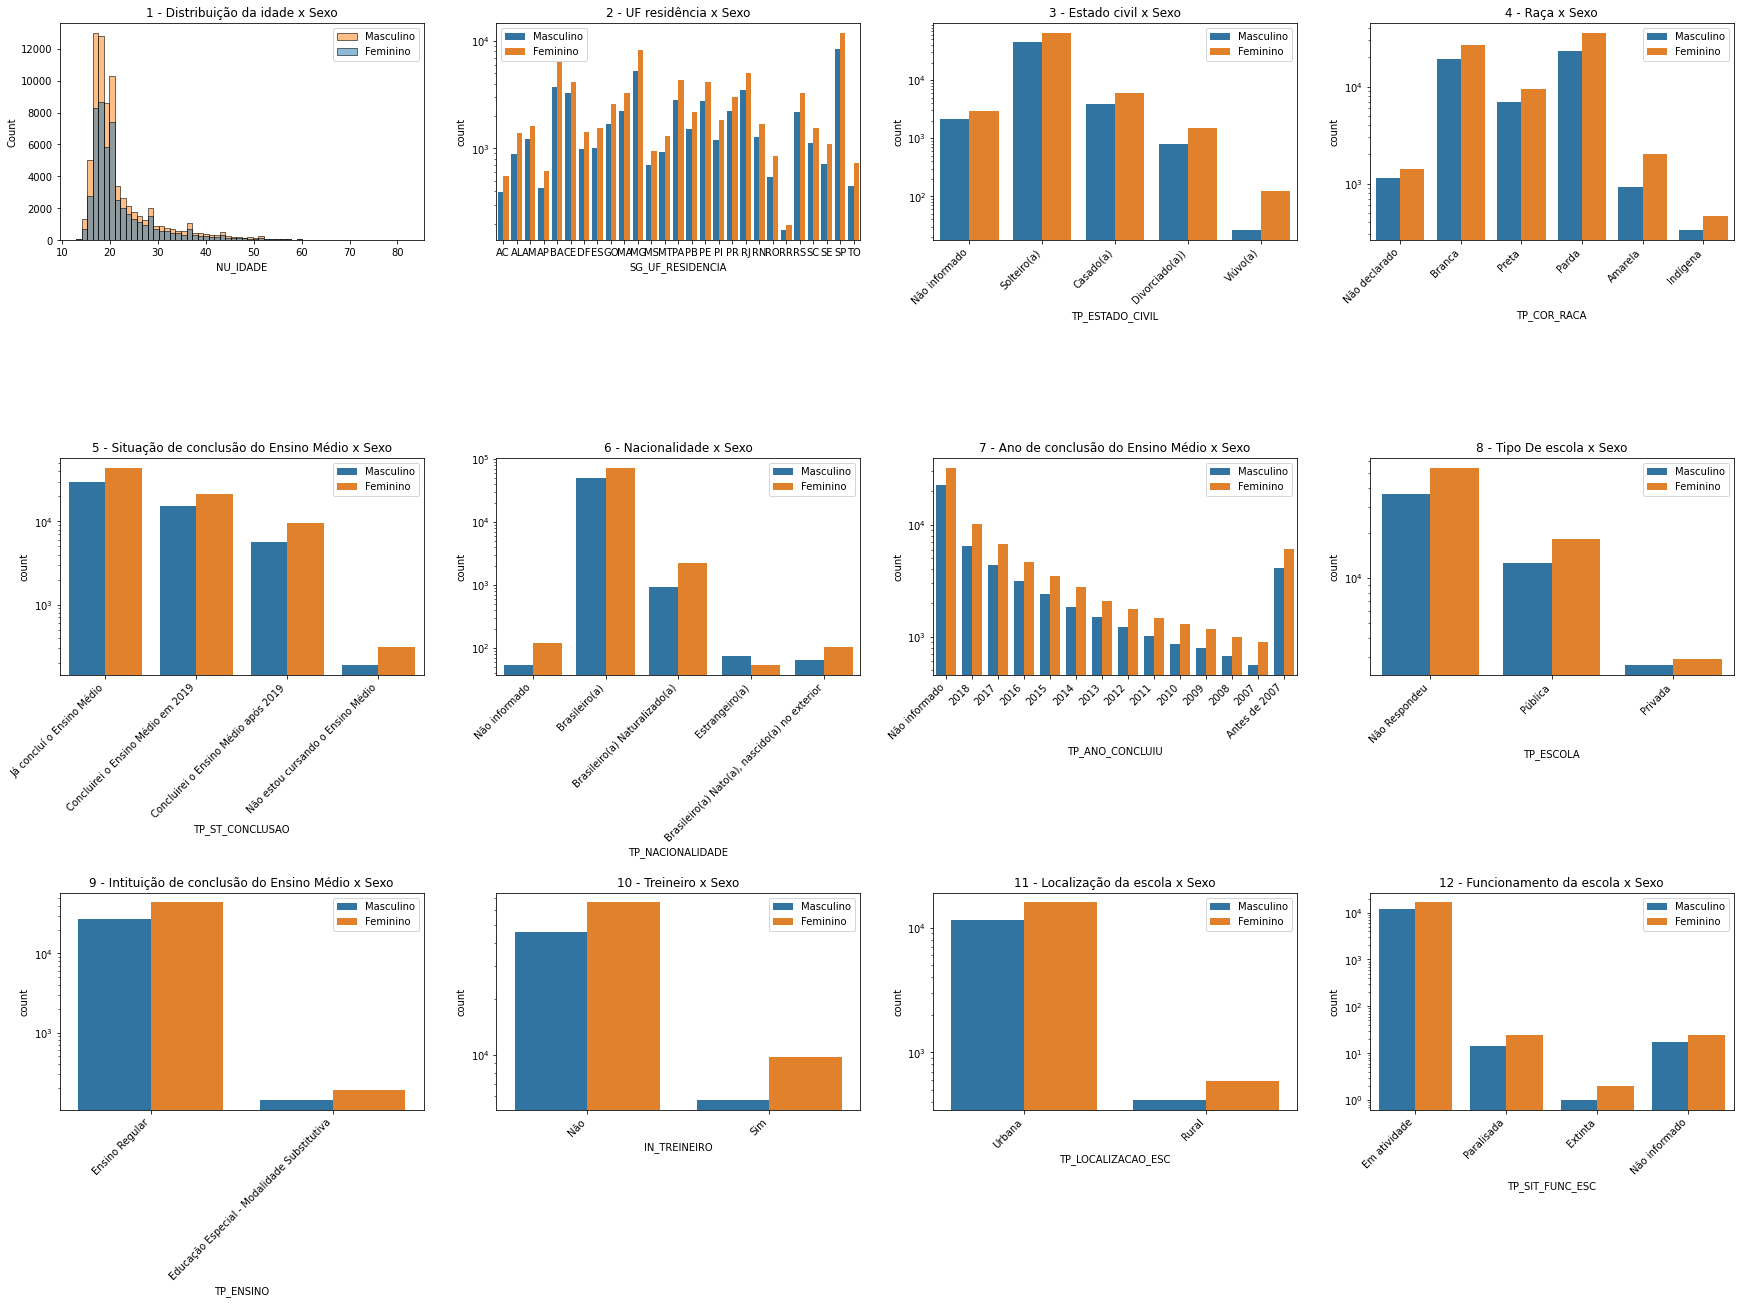

In [286]:
#Crio listas e dicionários para o preenchimento automático dos títulos e rótulos dos gráficos
#Melhorando a compreenção de cada um.

#Lista/Dicionário usado para entitular cada gráfico
itemList = ['TP_ESTADO_CIVIL','TP_COR_RACA','TP_ST_CONCLUSAO','TP_NACIONALIDADE','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC']
descriptionList = ["Estado civil", "Raça", "Situação de conclusão do Ensino Médio", "Nacionalidade", "Ano de conclusão do Ensino Médio", "Tipo De escola", "Intituição de conclusão do Ensino Médio", "Treineiro", "Localização da escola", "Funcionamento da escola"]
titleDict = dict(zip(itemList, descriptionList))

#Lista/Dicionário usado para mudar os rótulos do eixo 'x', facilitando o entendimento
xLabelList = [["Não informado", "Solteiro(a)", "Casado(a)", "Divorciado(a))", "Viúvo(a)"],["Não declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena"],
              ["Já concluí o Ensino Médio", "Concluirei o Ensino Médio em 2019", "Concluirei o Ensino Médio após 2019", "Não estou cursando o Ensino Médio"],
              ["Não informado","Brasileiro(a)","Brasileiro(a) Naturalizado(a)","Estrangeiro(a)","Brasileiro(a) Nato(a), nascido(a) no exterior"],
              ["Não informado","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008","2007", "Antes de 2007"],
              ["Não Respondeu","Pública","Privada","Exterior"], ["Ensino Regular","Educação Especial - Modalidade Substitutiva","Educação de Jovens e Adultos"],["Não","Sim"],
              ["Urbana","Rural"],["Em atividade","Paralisada","Extinta", "Não informado"]
]
xticksDict = dict(zip(itemList, xLabelList))

#Criação dos gráficos
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(30,20))
plt.subplots_adjust(hspace = 1)
#Os dois primeiros foram gerados separadamente pois possuem configurações únicas
sns.histplot(data=dadoCru, x='NU_IDADE', hue='TP_SEXO', bins=60, alpha=.5, ax=axes[0,0])
axes[0,0].set_title("1 - Distribuição da idade x Sexo")
axes[0,0].legend(["Masculino", "Feminino"])
sns.countplot(data=dadoCru, x='SG_UF_RESIDENCIA', hue='TP_SEXO', order=sorted(dadoCru.SG_UF_RESIDENCIA.unique()), log=True, ax=axes[0,1] )
axes[0,1].set_title("2 - UF residência x Sexo")
axes[0,1].legend(["Masculino", "Feminino"])

#Os demais subplots foram preenchidos automáticamente.
row = 0
for col, ii in enumerate(itemList): 
  sns.countplot(data=dadoCru, x=ii, hue='TP_SEXO', log=True, ax=axes[row%3,(col+2)%4]).set_xticklabels(xticksDict[ii], rotation=45, horizontalalignment='right')
  axes[row%3,(col+2)%4].set_title(str(col+3)+" - "+titleDict[ii]+" x Sexo")
  axes[row%3,(col+2)%4].legend(["Masculino", "Feminino"])
  if ((col+2)%4== 3): 
    row+=1


In [287]:
#Proporção de homens e mulheres iscritos
proporcaoFM = pd.DataFrame(dadoCru.groupby(["TP_SEXO"]).TP_SEXO.count()).T
proporcaoFM["F/M"] = proporcaoFM.F/proporcaoFM.M
proporcaoFM["F/Total"] = (proporcaoFM.F/(proporcaoFM.F+proporcaoFM.M))*100
proporcaoFM["M/Total"] = (proporcaoFM.M/(proporcaoFM.F+proporcaoFM.M))*100
proporcaoFM

TP_SEXO,F,M,F/M,F/Total,M/Total
TP_SEXO,75883,51497,1.473542,59.572146,40.427854


# Observações encontradas acima:
De maneira geral observamos que a maioria dos participantes da prova são mulheres, exceto quando contabilizamos estrangeiros.
1. Será que essa diferença também se reflete nas notas?( Precisamos de mais informações)
 
 
**Info extra:** Segundo o senso feito pelo IBGE em 2019 a população brasileira é composta por **48,2%** homens e **51,8%** mulheres.
[Educa.IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18320-quantidade-de-homens-e-mulheres.html#:~:text=Segundo%20dados%20da%20PNAD%20Contínu,51%2C8%25%20de%20mulheres.), ou seja, há mais mulheres inscritas do que o esperado, baseado na proporção da população.


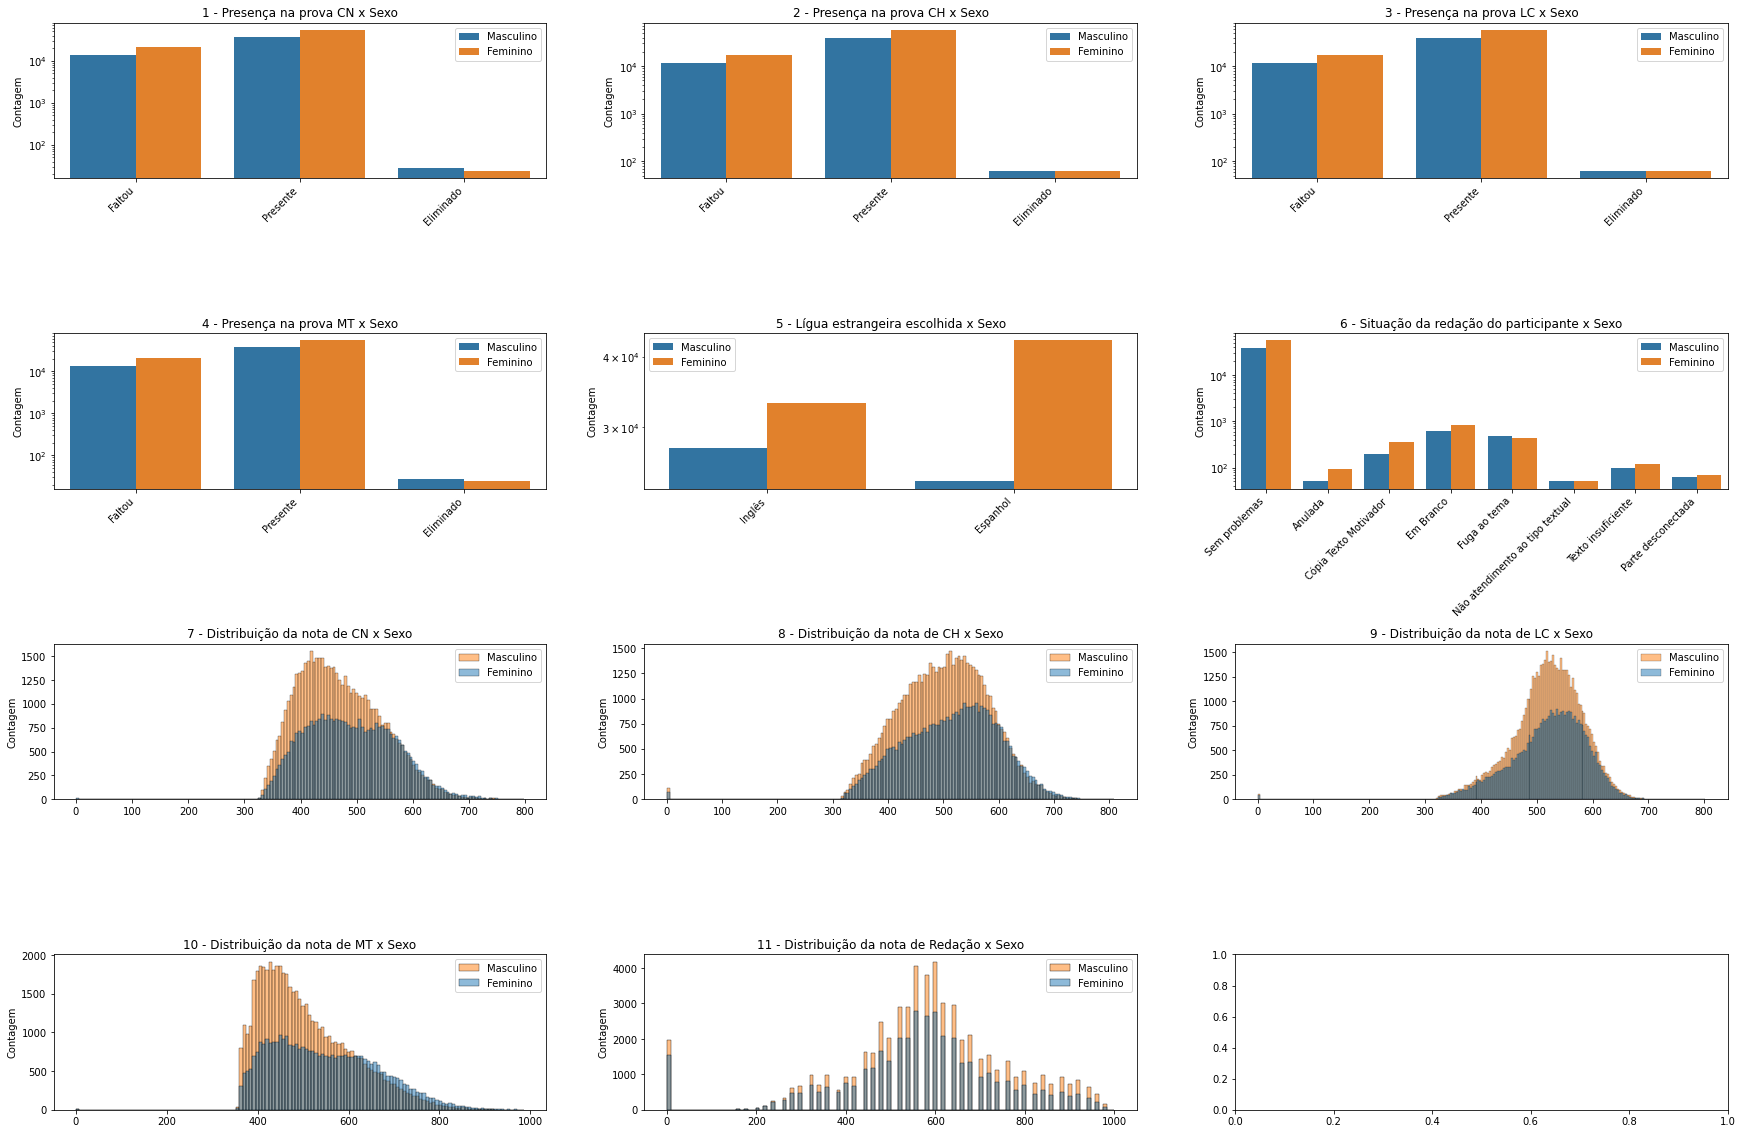

In [288]:
#Crio listas e dicionários para o preenchimento automático dos títulos e rótulos dos gráficos
#Melhorando a compreenção de cada um.
itemList = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','TP_LINGUA','TP_STATUS_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
descriptionList = ["Presença na prova CN", "Presença na prova CH", "Presença na prova LC", "Presença na prova MT", "Lígua estrangeira escolhida", "Situação da redação do participante", 
                   "Distribuição da nota de CN","Distribuição da nota de CH","Distribuição da nota de LC","Distribuição da nota de MT", "Distribuição da nota de Redação"]
titleDict = dict(zip(itemList, descriptionList))

#Lista/Dicionário usado para entitular cada gráfico
xLabelList = [["Faltou","Presente","Eliminado"],["Faltou","Presente","Eliminado"],["Faltou","Presente","Eliminado"],["Faltou","Presente","Eliminado"],["Inglês", "Espanhol"],
              ["Sem problemas","Anulada","Cópia Texto Motivador","Em Branco","Fuga ao tema","Não atendimento ao tipo textual","Texto insuficiente","Parte desconectada"]]
xticksDict = dict(zip(itemList, xLabelList))

#Criação dos gráficos
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(30,20))
plt.subplots_adjust(hspace = 1)

#Laço para criação automática dos gráficos, a condicional separa as duas primeiras linhas em countplots e as ultimas em histplots
row=0
for col, ii in enumerate(itemList): 
  if row < 2:
    sns.countplot(data=dadoCru, x=ii, hue='TP_SEXO', log=True, ax=axes[row%4,col%3]).set_xticklabels(xticksDict[ii], rotation=45, horizontalalignment='right')
  else:
    sns.histplot(data=dadoCru, x=ii, hue='TP_SEXO', ax=axes[row%4,col%3])
  
  axes[row%4,col%3].set_title(str(col+1)+" - "+titleDict[ii]+" x Sexo")
  axes[row%4,col%3].set_xlabel("")
  axes[row%4,col%3].set_ylabel("Contagem")
  axes[row%4,col%3].legend(["Masculino", "Feminino"])
  if (col%3== 2): 
    row+=1

# Observações encontradas acima:
Mais uma vez número de participantes do sexo feminino se mantém predominante. As únicas ressalvas estão nos gráficos 1 e 4, onde podemos ver que os eliminados dessas provas são em sua maioria homens, e no gráfico 6, onde homens aparentemente apresentam mais dificuldade de compreensão do tipo textual da redação. O que mais salta os olhos são as distribuições de notas, onde é clara, mais uma vez, a maior participação das mulheres nas notas, contudo, apesar de serem maioria, poucas mulheres apresentam notas mais altas. Já se tratando da redação, mais uma vez, as mulheres passam a ser maioria em todo o conjunto de notas presentes no histograma.
 
**Porque isso acontece?** 
1. Será que as mulheres possuem um menor nível de escolaridade?
2. Será que elas possuem mais tarefas que os homens, logo, menos tempo para estudarem?
3. Será que há alguma relação com a renda?
4. Alguma interferência cultura?
 
# Próximo passo, análise dos dados socioeconômicos
 
 
 
 



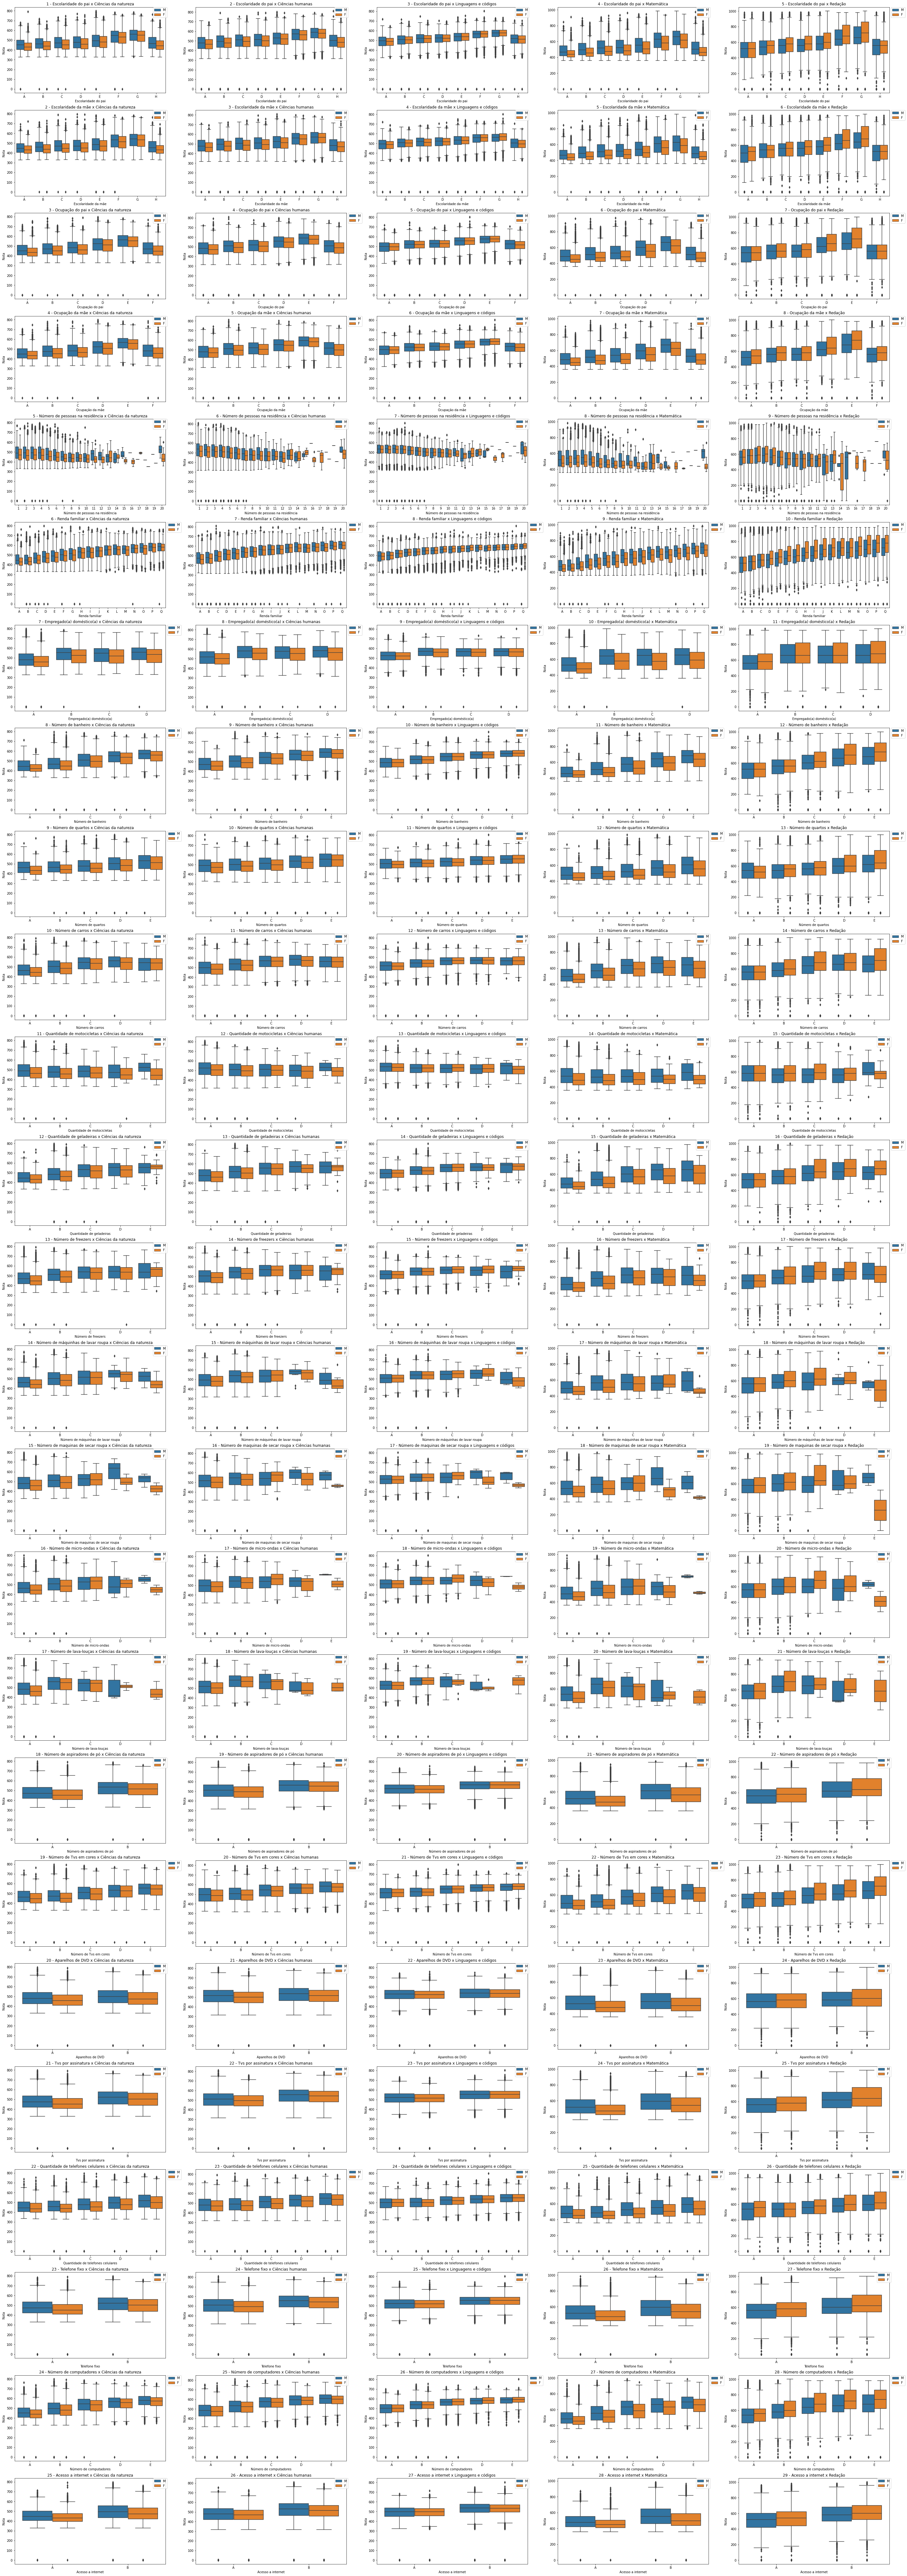

In [289]:
#Crio listas e dicionários para o preenchimento automático dos títulos e rótulos dos gráficos
#Melhorando a compreenção de cada um.
#Lista/Dicionário usado para entitular cada gráfico
socialList = [ x for x in dadoCru.columns.values if "Q0" in x]
titleDict = ["Escolaridade do pai", "Escolaridade da mãe", "Ocupação do pai", "Ocupação da mãe", "Número de pessoas na residência","Renda familiar", "Empregado(a) doméstico(a)",
            "Número de banheiro", "Número de quartos", "Número de carros", "Quantidade de motocicletas", "Quantidade de geladeiras", "Número de freezers", "Número de máquinhas de lavar roupa",
            "Número de maquinas de secar roupa", "Número de micro-ondas", "Número de lava-louças", "Número de aspiradores de pó", "Número de Tvs em cores", "Aparelhos de DVD",
            "Tvs por assinatura", "Quantidade de telefones celulares", "Telefone fixo", "Número de computadores", "Acesso a internet"]
socialDict = dict(zip(socialList, titleDict))   

#Lista/Dicionário usado para entitular cada gráfico
notasList = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
notasNomes = ["Ciências da natureza", "Ciências humanas", "Linguagens e códigos", "Matemática", "Redação"]
notasDict = dict(zip(notasList, notasNomes))

#Criação dos gráficos
row=0
fig, axes = plt.subplots(ncols=5, nrows=25, figsize=(50,150))
for idx, ii in enumerate(socialList):
  for col, jj in enumerate(notasList):
    sns.boxplot(data=dadoCru, x=ii, y = jj, hue="TP_SEXO", order=sorted(dadoCru[ii].unique()), ax=axes[row,col])
    axes[row,col].set_title(str(idx+col+1)+" - "+socialDict[ii]+" x "+notasDict[jj])
    axes[row,col].legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    axes[row,col].set_xlabel(socialDict[ii])
    axes[row,col].set_ylabel("Nota")
  row+=1
  

# Observações encontradas acima:
 
Após essa análise geral de todos os dados socioeconômicos presentes no "dataset" encontramos mais informações que se somam ao que encontramos na análise anterior a esta, naquela análise vimos um estranho acúmulo de inscrições que alcançaram apenas notas medianas, mesmo sendo maioria. E agora, nos dados socioeconômicos observamos mais informações que se somam a essa disparidade. De maneira geral, os homens alcançaram médias maiores nas notas das provas, exceto em 'linguagens e códigos' e na 'redação'. Outro ponto relevante é quando chegamos aos gráficos 6 a 10, neles conseguimos ter uma breve visão de como as notas se correlacionam com a renda familiar. É bem evidente nesses gráficos que o aumento da renda e da nota caminham juntas(**A** representa a menor renda, **B** a segunda menor e assim sucessivamente, sendo **Q** a representação da maior renda). Outro ponto que fica claro é o desencontro das notas alcançadas por mulheres e homens, em famílias com rendas menores esse descasamento é o maior observado, sendo atenuado à medida que a renda familiar aumenta.
 
Outro ponto interessante é encontrado nos gráficos 25 a 29, onde a influência do acesso à internet nas notas.
 
**Por que isso acontece?** 
(Revendo as suposições anteriores.)
1. ~Será que as mulheres possuem um menor nível de escolaridade?~
2. Será que elas possuem mais tarefas que os homens, logo, menos tempo para estudarem?
3. Será que há alguma relação com a renda?
4. Alguma interferência cultural?
 
**Explicação das hipóteses:**
 
1 - Acredito que essa pergunta não faz sentido, pois de maneira geral há mais mulheres inscritas em todas as faixas de idade. O que me leva a pensar que nível de escolaridade não é o causador da diferença das notas. Por essa razão foi descartada.
 
2 - Essa é a pergunta que parece mais plausível, culturalmente, o Brasil ainda é um país machista e com uma estrutura patriarcal engessada. É comum em nossa cultura, infelizmente, a ideia de que as mulheres são responsáveis pelas tarefas domésticas, além da perpetuação de preconceitos como a 'afirmação', sem sentido, de que homens são mais inteligentes e mais capazes que as mulheres. O que, a meu ver, cria uma cultura que não estimula as mulheres a se desenvolverem, não reforça ou recompensa seu esforço, gerando assim um ciclo que marginaliza essas mulheres, não as permitindo demonstrar ou mesmo reconhecer sua imensa capacidade.
 
3 - A renda mostra de maneira bem clara tudo o que foi mencionado no tópico anterior, famílias mais pobres e possivelmente com menos acesso à educação, reforçam inconscientemente esses preconceitos e acabam por sobrecarregar as mulheres das famílias com tarefas domésticas. Refletindo assim no resultado alcançado durante o ENEM. À medida que a renda aumenta, esse desencontro de desempenho também diminui, possivelmente devido ao acesso a mais informações por essas famílias, além da possibilidade de que as tarefas domésticas possam ser executadas por pessoas contratadas com esse fim. Permitindo assim, que essas mulheres possam se dedicar ao estudo, levando a resultados melhores.
 
4 - Para mim, a interferência cultural só se afirmou com as análises anteriores.
 
**Novas suposições:**
1. Será que outras minorias sofrem com esse mesmo tipo de problema? Com os dados que possuímos podemos verificar o desempenho dos inscritos agrupados por raça e/ou portadores de alguma deficiência.
2. Será que há uma diferença grande entre os inscritos de escolas públicas e particulares?
3. E em relação às zonas rurais e urbanas?
4. Estrangeiros e brasileiros?(Será que isso poderia nos mostrar quão (de)eficiente é nosso ensino básico?)
 
#5. Listagem de perguntas a serem respondidas
 
A partir de agora, analisarei os dados em busca de responder perguntas específicas. Esses serão meus alvos:
 
1. Será que outras minorias sofrem com esse mesmo tipo de problema? Com os dados que possuímos podemos verificar o desempenho dos inscritos agrupados por raça e portadores de alguma deficiência.
2. Será que há uma diferença grande entre os inscritos de escolas públicas e particulares?
3. E em relação às zonas rurais e urbanas?
4. Estrangeiros e brasileiros?(Será que isso poderia nos mostrar quão (de)eficiente é nosso ensino básico?)
5. Será que as inscritas possuem mais tarefas que os homens, logo, menos tempo para estudarem?
6. Será que há alguma relação com a renda?
7. Alguma interferência cultural?
 
 
- Primeiramente, para chegar a essas respostas irei criar uma "nota geral" que será a média de todas as notas dos inscritos, faço isso para evitar analisar cada nota separadamente.


In [290]:
#Criação da coluna NU_NOTA_TOTAL, que contém a média de todas as notas 
dadoCru["NU_NOTA_TOTAL"] = dadoCru[notasList].mean(axis=1)
dadoCru.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,457.780000
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,394.866667
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,470.100000
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,511.140000
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,560.700000


#Vamos tentar encontra a relação entre os inscritos e sua raça ou renda

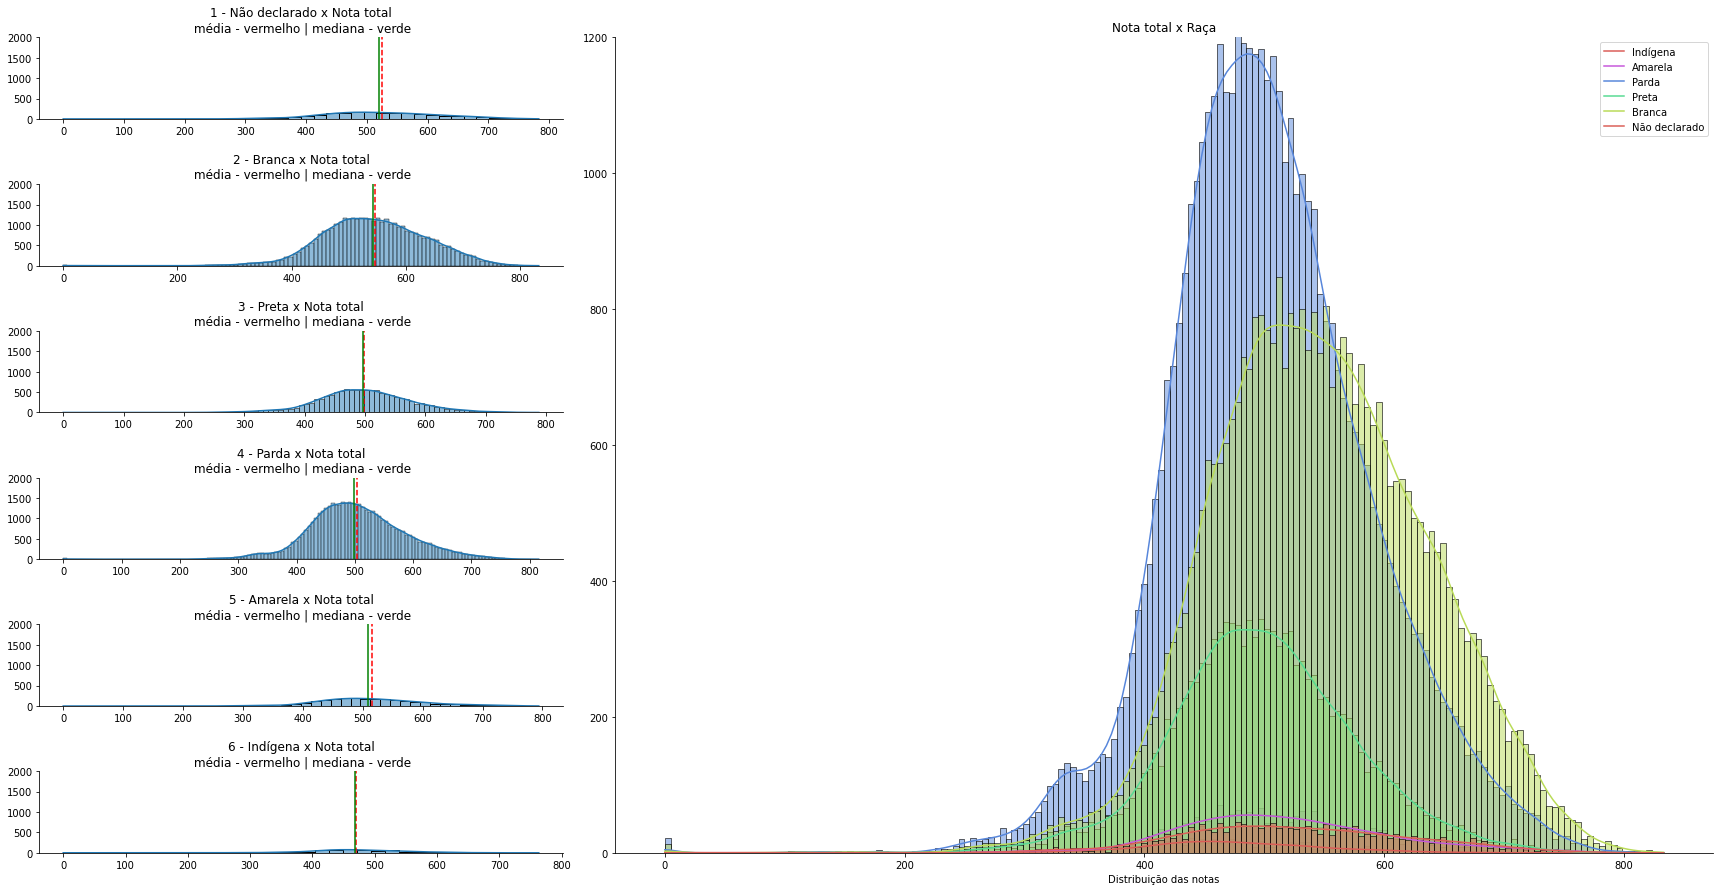

In [301]:
#dadoCru.groupby(["TP_COR_RACA"])["NU_NOTA_TOTAL"].plot(kind="hist", alpha=.8, bins=40)
racaList = ["Não declarado","Branca","Preta","Parda","Amarela","Indígena" ]

#Automatização da formatação do gráfico
def axSettings(ax, xlabel="", ylabel="", title=""):
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_title(title)

#Gráfico
fig = plt.figure(figsize=(30,15))
#gridspec utilizado para organizar os gráficos em uma grade
gs = gridspec.GridSpec(nrows=6, ncols=3, figure=fig, width_ratios= [1, 1, 1], height_ratios=[1, 1, 1, 1, 1, 1], wspace=0.1, hspace=.8)

ax = [None]*(6)
for ii in range(6):
  ax[ii] = fig.add_subplot(gs[ii, 0])
  auxData = dadoCru[dadoCru.TP_COR_RACA == ii ]
  sns.histplot(data=auxData, x="NU_NOTA_TOTAL", ax=ax[ii], kde=True)
  ax[ii].set_ylim(0,2000)
  ax[ii].axvline(auxData.NU_NOTA_TOTAL.mean(), color='r', linestyle='--')
  ax[ii].axvline(auxData.NU_NOTA_TOTAL.median(), color='g', linestyle='-')
  axSettings(ax[ii],"", "", str(ii+1)+" - "+racaList[ii]+" x Nota total\n média - vermelho | mediana - verde")

ax6 = fig.add_subplot(gs[0:6, 1:3])
sns.histplot(data=dadoCru, x="NU_NOTA_TOTAL", hue="TP_COR_RACA", ax=ax6, kde=True, palette="hls", alpha=.5)
ax6.set_ylim(0,1200)
axSettings(ax6, "Distribuição das notas", "", "Nota total x Raça")
ax6.legend(racaList[::-1])

plt.show()

In [302]:
#Proporção quantidade de inscritos por raça
proporcaoRaca = pd.DataFrame(dadoCru.groupby(["TP_COR_RACA"]).TP_COR_RACA.count()).T
proporcaoRaca.columns = racaList
total = proporcaoRaca.apply(sum, axis=1)

#Função criada para facilitar o calculo das proporções de inscritos por raca
def autoFill(df, title, total):
  return df[title]/total

for ii in racaList:
  proporcaoRaca[ii+"/Total"] = autoFill(proporcaoRaca, ii, total)*100

print("Tabela mostrando a quantidade de inscritos por raça e a proporção(%) em relação ao total de inscritos:")
proporcaoRaca

Tabela mostrando a quantidade de inscritos por raça e a proporção(%) em relação ao total de inscritos:


,Não declarado,Branca,Preta,Parda,Amarela,Indígena,Não declarado/Total,Branca/Total,Preta/Total,Parda/Total,Amarela/Total,Indígena/Total
TP_COR_RACA,2565,45616,16300,59132,2975,792,2.01366,35.810959,12.796357,46.42173,2.335531,0.621762


## Observações encontradas acima:
 
No gráfico e na tabela logo acima, podemos entender a proporção de inscritos por raça e ver como eles se saíram da prova de maneira geral.
 
Fica bem evidente que os inscritos que se identificam como brancos, possuem uma distribuição de notas ligeiramente deslocada para a direita, sinalizando maiores notas.
 
 
## Info extra
 
Segundo o senso de 2019, **42,7%** dos brasileiros se identificam como **brancos**, **46,8%** como **pardos**, **9,4%** como **pretos** e **1,1%** como **amarelos** ou **indígenas**. [IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html)


In [17]:
notaMedia = dadoCru.NU_NOTA_TOTAL.mean()
mask = dadoCru.NU_NOTA_TOTAL >= notaMedia
partAcimaMedia = pd.DataFrame(dadoCru[mask])
proporcaoRacaAcimaMedia = pd.DataFrame(partAcimaMedia.groupby(["TP_COR_RACA"]).TP_COR_RACA.count()).T
proporcaoRacaAcimaMedia.columns = racaList
#total = proporcaoRacaAcimaMedia.apply(sum, axis=1)

proporcaoRacaAcimaMedia.index = ["Acima_Da_Media"]

proporcaoRacaAcimaMedia.loc["Abaixo_Da_Media",racaList] = dadoCru[~mask].groupby(["TP_COR_RACA"]).NU_NOTA_TOTAL.count().values
proporcaoRacaAcimaMedia.loc["Acima_600",racaList] = partAcimaMedia[partAcimaMedia.NU_NOTA_TOTAL >= 600].groupby(["TP_COR_RACA"]).NU_NOTA_TOTAL.count().values
proporcaoRacaAcimaMedia.loc["Acima_700",racaList] = partAcimaMedia[partAcimaMedia.NU_NOTA_TOTAL >= 700].groupby(["TP_COR_RACA"]).NU_NOTA_TOTAL.count().values

for ii in racaList:
  proporcaoRacaAcimaMedia.loc["Abaixo_Da_Media", ii+"/Total"] = autoFill(proporcaoRacaAcimaMedia.loc["Abaixo_Da_Media"], ii, total[0])*100
  proporcaoRacaAcimaMedia.loc["Acima_Da_Media", ii+"/Total"] = autoFill(proporcaoRacaAcimaMedia.loc["Acima_Da_Media"], ii, total[0])*100
  proporcaoRacaAcimaMedia.loc["Acima_600", ii+"/Total"] = autoFill(proporcaoRacaAcimaMedia.loc["Acima_600"], ii, total[0])*100
  proporcaoRacaAcimaMedia.loc["Acima_700", ii+"/Total"] = autoFill(proporcaoRacaAcimaMedia.loc["Acima_700"], ii, total[0])*100

print("Tabela mostrando a proporção de inscritos por raça, agrupados em 4 categorias que prepresentam a quantidade de pessoas que tiraram acima ou abaixo de uma determinada nota.\n")
print("Nota média:", notaMedia)
proporcaoRacaAcimaMedia

Tabela mostrando a proporção de inscritos por raça, agrupados em 4 categorias que prepresentam a quantidade de pessoas que tiraram acima ou abaixo de uma determinada nota.

Nota média: 519.1747686796551


,Não declarado,Branca,Preta,Parda,Amarela,Indígena,Não declarado/Total,Branca/Total,Preta/Total,Parda/Total,Amarela/Total,Indígena/Total
Acima_Da_Media,971.0,21800.0,4553.0,17893.0,1037.0,151.0,0.762286,17.114147,3.574344,14.046946,0.814100,0.118543
Abaixo_Da_Media,965.0,14517.0,7532.0,27124.0,1285.0,434.0,0.757576,11.396609,5.913016,21.293767,1.008793,0.340713
Acima_600,421.0,9825.0,1113.0,5508.0,359.0,26.0,0.330507,7.713142,0.873764,4.324070,0.281834,0.020411
Acima_700,66.0,1529.0,86.0,629.0,69.0,1.0,0.051813,1.200345,0.067515,0.493798,0.054169,0.000785


## Observações encontradas acima:
 
Aqui, nesta tabela, buscamos entender melhor o que encontramos no histograma logo acima. Conseguimos ver que a medida que a nota aumenta, o grupo de inscritos vai se tornando mais "branco".
 
## Próximo passo:
 
Abaixo buscarei entender a relação entre as notas, o tipo de escola e sua localidade.


[Text(0, 0, 'Zona urbana'), Text(0, 0, 'Zona rural')]

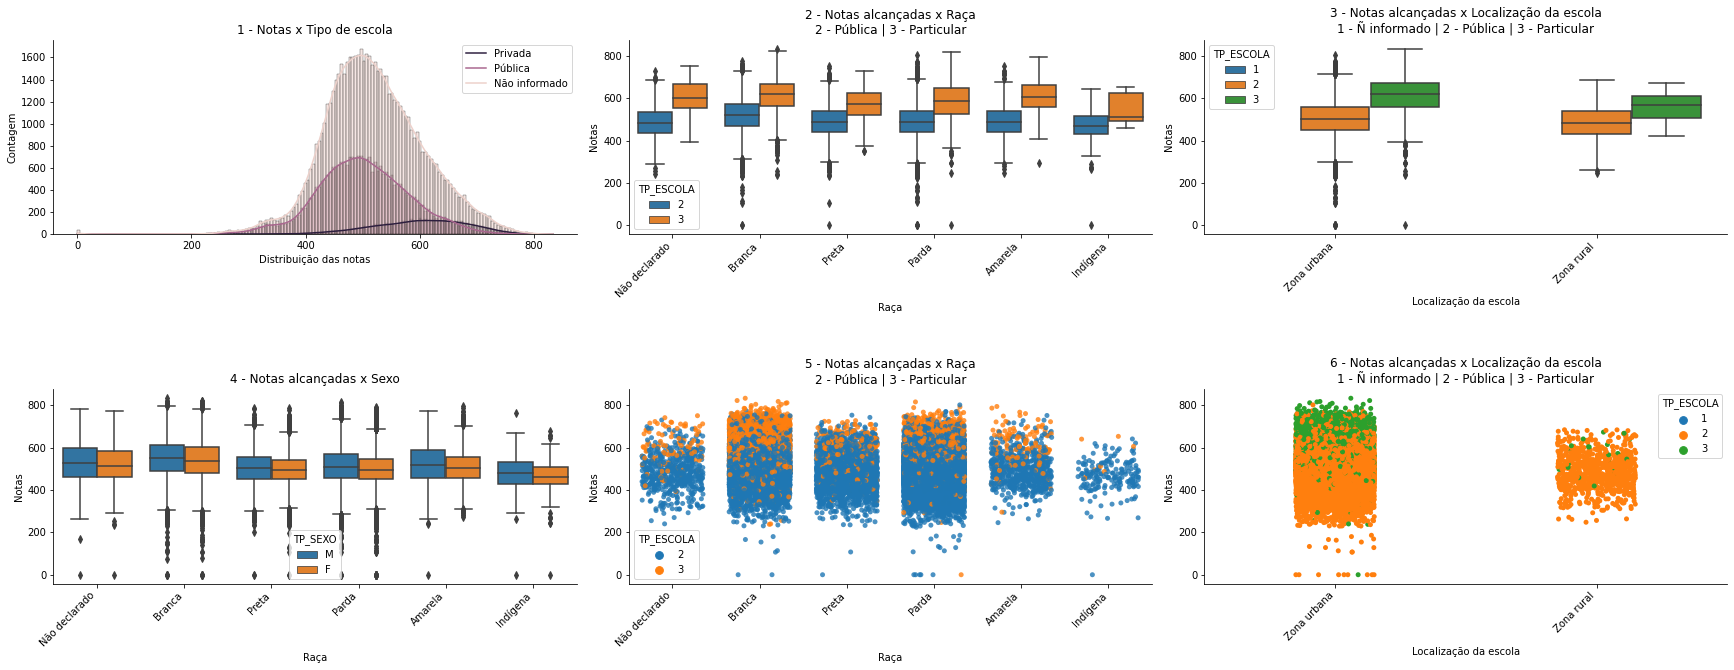

In [303]:
escolaList = ["Pública","Privada","Exterior"]
localList = ["Zona urbana", "Zona rural"]

#Criação dos gráficos
fig = plt.figure(figsize=(30,10))
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig, wspace=0.1, hspace=.8)

ax0 = fig.add_subplot(gs[0, 0])
sns.histplot(data=dadoCru, x="NU_NOTA_TOTAL", hue="TP_ESCOLA", ax=ax0, kde=True)
axSettings(ax0, "Distribuição das notas", "Contagem", "1 - Notas x Tipo de escola")
legendList = ["Não informado"]+escolaList[:-1]
ax0.legend(legendList[::-1])

ax1 = fig.add_subplot(gs[0, 1])
sns.boxplot(data = dadoCru[dadoCru.TP_ESCOLA >1], y="NU_NOTA_TOTAL", x="TP_COR_RACA", hue="TP_ESCOLA", ax=ax1)
axSettings(ax1, "Raça", "Notas", "2 - Notas alcançadas x Raça\n2 - Pública | 3 - Particular")
ax1.set_xticklabels(racaList, rotation=45, horizontalalignment='right')

ax2 = fig.add_subplot(gs[0, 2])
sns.boxplot(data = dadoCru, y="NU_NOTA_TOTAL", x="TP_LOCALIZACAO_ESC", hue="TP_ESCOLA", ax=ax2 )
axSettings(ax2, "Localização da escola", "Notas", "3 - Notas alcançadas x Localização da escola\n1 - Ñ informado | 2 - Pública | 3 - Particular")
ax2.set_xticklabels(localList, rotation=45, horizontalalignment='right')

ax3 = fig.add_subplot(gs[1, 0])
sns.boxplot(data = dadoCru, y="NU_NOTA_TOTAL", x="TP_COR_RACA", hue="TP_SEXO", ax=ax3 )
axSettings(ax3, "Raça", "Notas", "4 - Notas alcançadas x Sexo")
ax3.set_xticklabels(racaList, rotation=45, horizontalalignment='right')

ax4 = fig.add_subplot(gs[1, 1])
sns.stripplot(data = dadoCru[dadoCru.TP_ESCOLA >1], y="NU_NOTA_TOTAL", x="TP_COR_RACA", hue="TP_ESCOLA", ax=ax4, alpha=.8, jitter=0.35)
axSettings(ax4, "Raça", "Notas", "5 - Notas alcançadas x Raça\n2 - Pública | 3 - Particular")
ax4.set_xticklabels(racaList, rotation=45, horizontalalignment='right')

ax5 = fig.add_subplot(gs[1, 2])
sns.stripplot(data = dadoCru, y="NU_NOTA_TOTAL", x="TP_LOCALIZACAO_ESC", hue="TP_ESCOLA", ax=ax5, jitter=0.15)
axSettings(ax5, "Localização da escola", "Notas", "6 - Notas alcançadas x Localização da escola\n1 - Ñ informado | 2 - Pública | 3 - Particular")
ax5.set_xticklabels(localList, rotation=45, horizontalalignment='right')


## Observações encontradas acima:

Nessa análise observamos a distribuição das notas em relação ao tipo de escola que os participantes frequêntam, além do local onde as escolas estão. 

No gráfico **1** podemos observar a distribuição das notas em relação ao tipo de ensino que o candidato possui. Devido ao grande número de valores não informados, decidi nos gráficos seguintes contabilizar apenas escolas **particulares** e **públicas**

A partir do gráfico **2** conseguimos ver que populações minoritárias apresentam um desemprenho menor nas notas e isso se acentua ainda mais quando incluimos na análise o sexo do candidato. Contudo, o que mais salta aos olhos é o papel fundamental da renda no desempenho final do participante. 

Essa é a informação que explorarei mais a seguir.


In [305]:
#Aqui analisaremos como os estrangeiros se saem em relação aos demais inscritos.
presencaList = ["TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_MT"]

#Crio 'mascaras' para filtras os dados desejados
mask = []
for ii in presencaList:
  mask.append(dadoCru[ii] == 1)

#Crio uma tabela com os candidatos que estiveram presentes em todas as provas
dadoSemAusentes = dadoCru[ mask[0] & mask[1] & mask[2] & mask[3]]

#Agrupo por nacionalidade e uso describe() para para analisar o desempenho dos participantes 
notasPorNacionalidade = dadoSemAusentes.groupby(["TP_NACIONALIDADE"]).NU_NOTA_TOTAL.describe().T
notasPorNacionalidade.columns = ["Não informado","Brasileiro(a)","Brasileiro(a) Naturalizado(a)","Estrangeiro(a)","Brasileiro(a) Nato(a), nascido(a) no exterior"]
notasPorNacionalidade

,Não informado,Brasileiro(a),Brasileiro(a) Naturalizado(a),Estrangeiro(a),"Brasileiro(a) Nato(a), nascido(a) no exterior"
count,132.000000,89860.000000,2322.000000,91.000000,134.000000
mean,503.854848,523.712342,486.947743,539.266154,560.534776
std,88.821185,83.809389,69.362678,92.082821,89.904298
min,310.880000,0.000000,147.080000,298.380000,387.840000
25%,448.345000,464.460000,443.230000,484.850000,481.850000
50%,490.550000,516.280000,484.200000,534.860000,561.820000
75%,553.685000,578.265000,526.795000,584.080000,629.045000
max,752.800000,832.820000,751.760000,780.060000,751.460000


## Observações encontradas acima:

Nessa tabela podemos observar que em média estrangeiros e brasileiros nascidos no exterior se saem melhor nas provas.

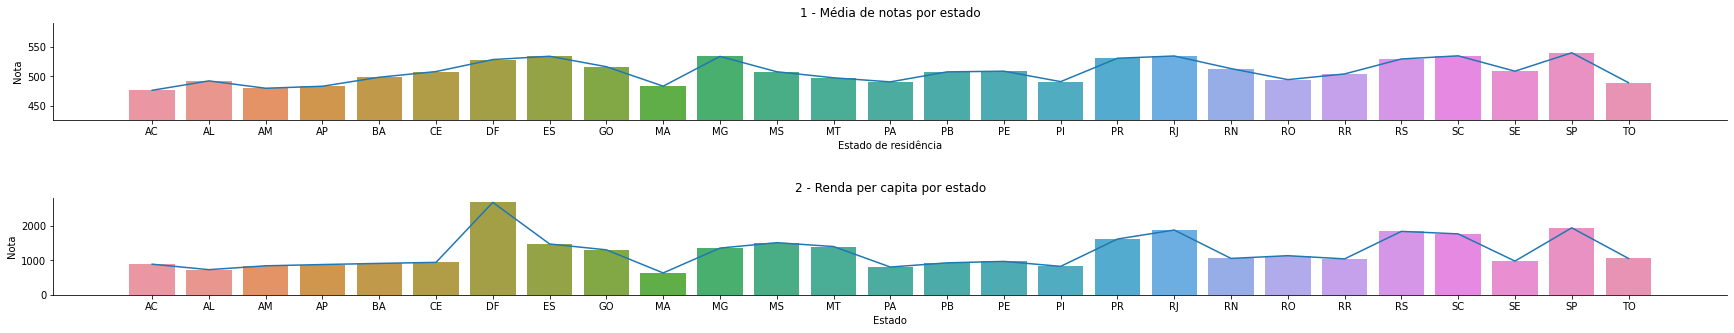

In [392]:
fig = plt.figure(figsize=(30,5))
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig, wspace=0.1, hspace=.8)

notaMediaPorEstado = pd.DataFrame(dadoSemAusentes.groupby(["SG_UF_RESIDENCIA"]).NU_NOTA_TOTAL.median()).reset_index()
dfRendimentoPerCapita = pd.DataFrame()
dfRendimentoPerCapita["Estado"] = ['DF', 'SP', 'RJ', 'RS', 'SC', 'PR', 'MS', 'ES', 'MT', 'MG', 'GO', 'RO', 'RN', 'TO', 'RR', 'SE', 'PE', 'CE', 'PB', 'BA', 'AC', 'AP', 'AM', 'PI', 'PA','AL', 'MA']
dfRendimentoPerCapita["Renda"] = [2685,1945,1881,1842,1769,1620,1514,1476,1402,1357,1306,1136,1056,1055,1043,979,970,942,928,912,889,879,842,826,806,730,635]


ax1 = fig.add_subplot(gs[0,0:3])
sns.barplot(data=mediaPorEstado, x="SG_UF_RESIDENCIA", y="NU_NOTA_TOTAL", ax=ax1)
sns.lineplot(data=mediaPorEstado.sort_values(["SG_UF_RESIDENCIA"]), x="SG_UF_RESIDENCIA", y="NU_NOTA_TOTAL",ax=ax1)
ax1.set_ylim(min(mediaPorEstado.NU_NOTA_TOTAL)-50, max(mediaPorEstado.NU_NOTA_TOTAL)+50)
axSettings(ax1, "Estado de residência","Nota", "1 - Média de notas por estado")

ax2 = fig.add_subplot(gs[1,0:3])
sns.barplot(data=dfRendimentoPerCapita, x="Estado", order=list(sorted(dfRendimentoPerCapita.Estado)), y="Renda",ax=ax2)
sns.lineplot(data=dfRendimentoPerCapita.sort_values(["Estado"]), x="Estado", y="Renda",ax=ax2)
axSettings(ax2, "Estado","Nota", "2 - Renda per capita por estado")

## Observações encontradas acima:
 
Seguindo essa trilha em busca de entender o papel da renda familiar como o principal responsável pelo rendimento do candidato, cheguei a esse gráfico que para mim resume bem o que vemos observado. No gráfico **1** temos a média das notas obtidas por todos os participantes agrupados por estado, já no gráfico **2** possuímos um senso de 2019 demonstrando a renda per capita por estado.
 
Alinhando esses dois gráficos conseguimos ver como eles se correlacionam, à medida que a renda per capita aumenta, a média do estado também aumenta. Quando ela diminui, a nota segue o mesmo caminho.
 
[Dados da renda per capita](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita)


In [409]:
#Aqui eu crio uma tabela agrupando os inscritos por raça, estado de residência e renda, conto a quantidade de inscritos por categoria em cada estado
temp = pd.DataFrame(dadoSemAusentes.groupby(["SG_UF_RESIDENCIA","TP_COR_RACA", "Q006"]).NU_NOTA_TOTAL.count()).T
dfRacaRendaEstado = temp.columns.to_frame(index=True).reset_index(drop=True)
dfRacaRendaEstado["NU_NOTA_TOTAL"] = temp.loc["NU_NOTA_TOTAL"].values

#Normalização do dado
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dfRacaRendaEstado[["NU_NOTA_TOTAL"]].values.astype(float))
dfRacaRendaEstado["NU_NOTA_TOTAL_NORM"]  = x_scaled

dfRacaRendaEstado.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,Q006,NU_NOTA_TOTAL,NU_NOTA_TOTAL_NORM
0,AC,0,B,5,0.002441
1,AC,0,C,2,0.000610
2,AC,0,D,1,0.000000
3,AC,0,E,1,0.000000
4,AC,0,K,1,0.000000


Legenda: 0 - Não declarado, 1 - Branca, 2 - Preta, 3 - Parda, 4 - Amarela, 5 - Indígena


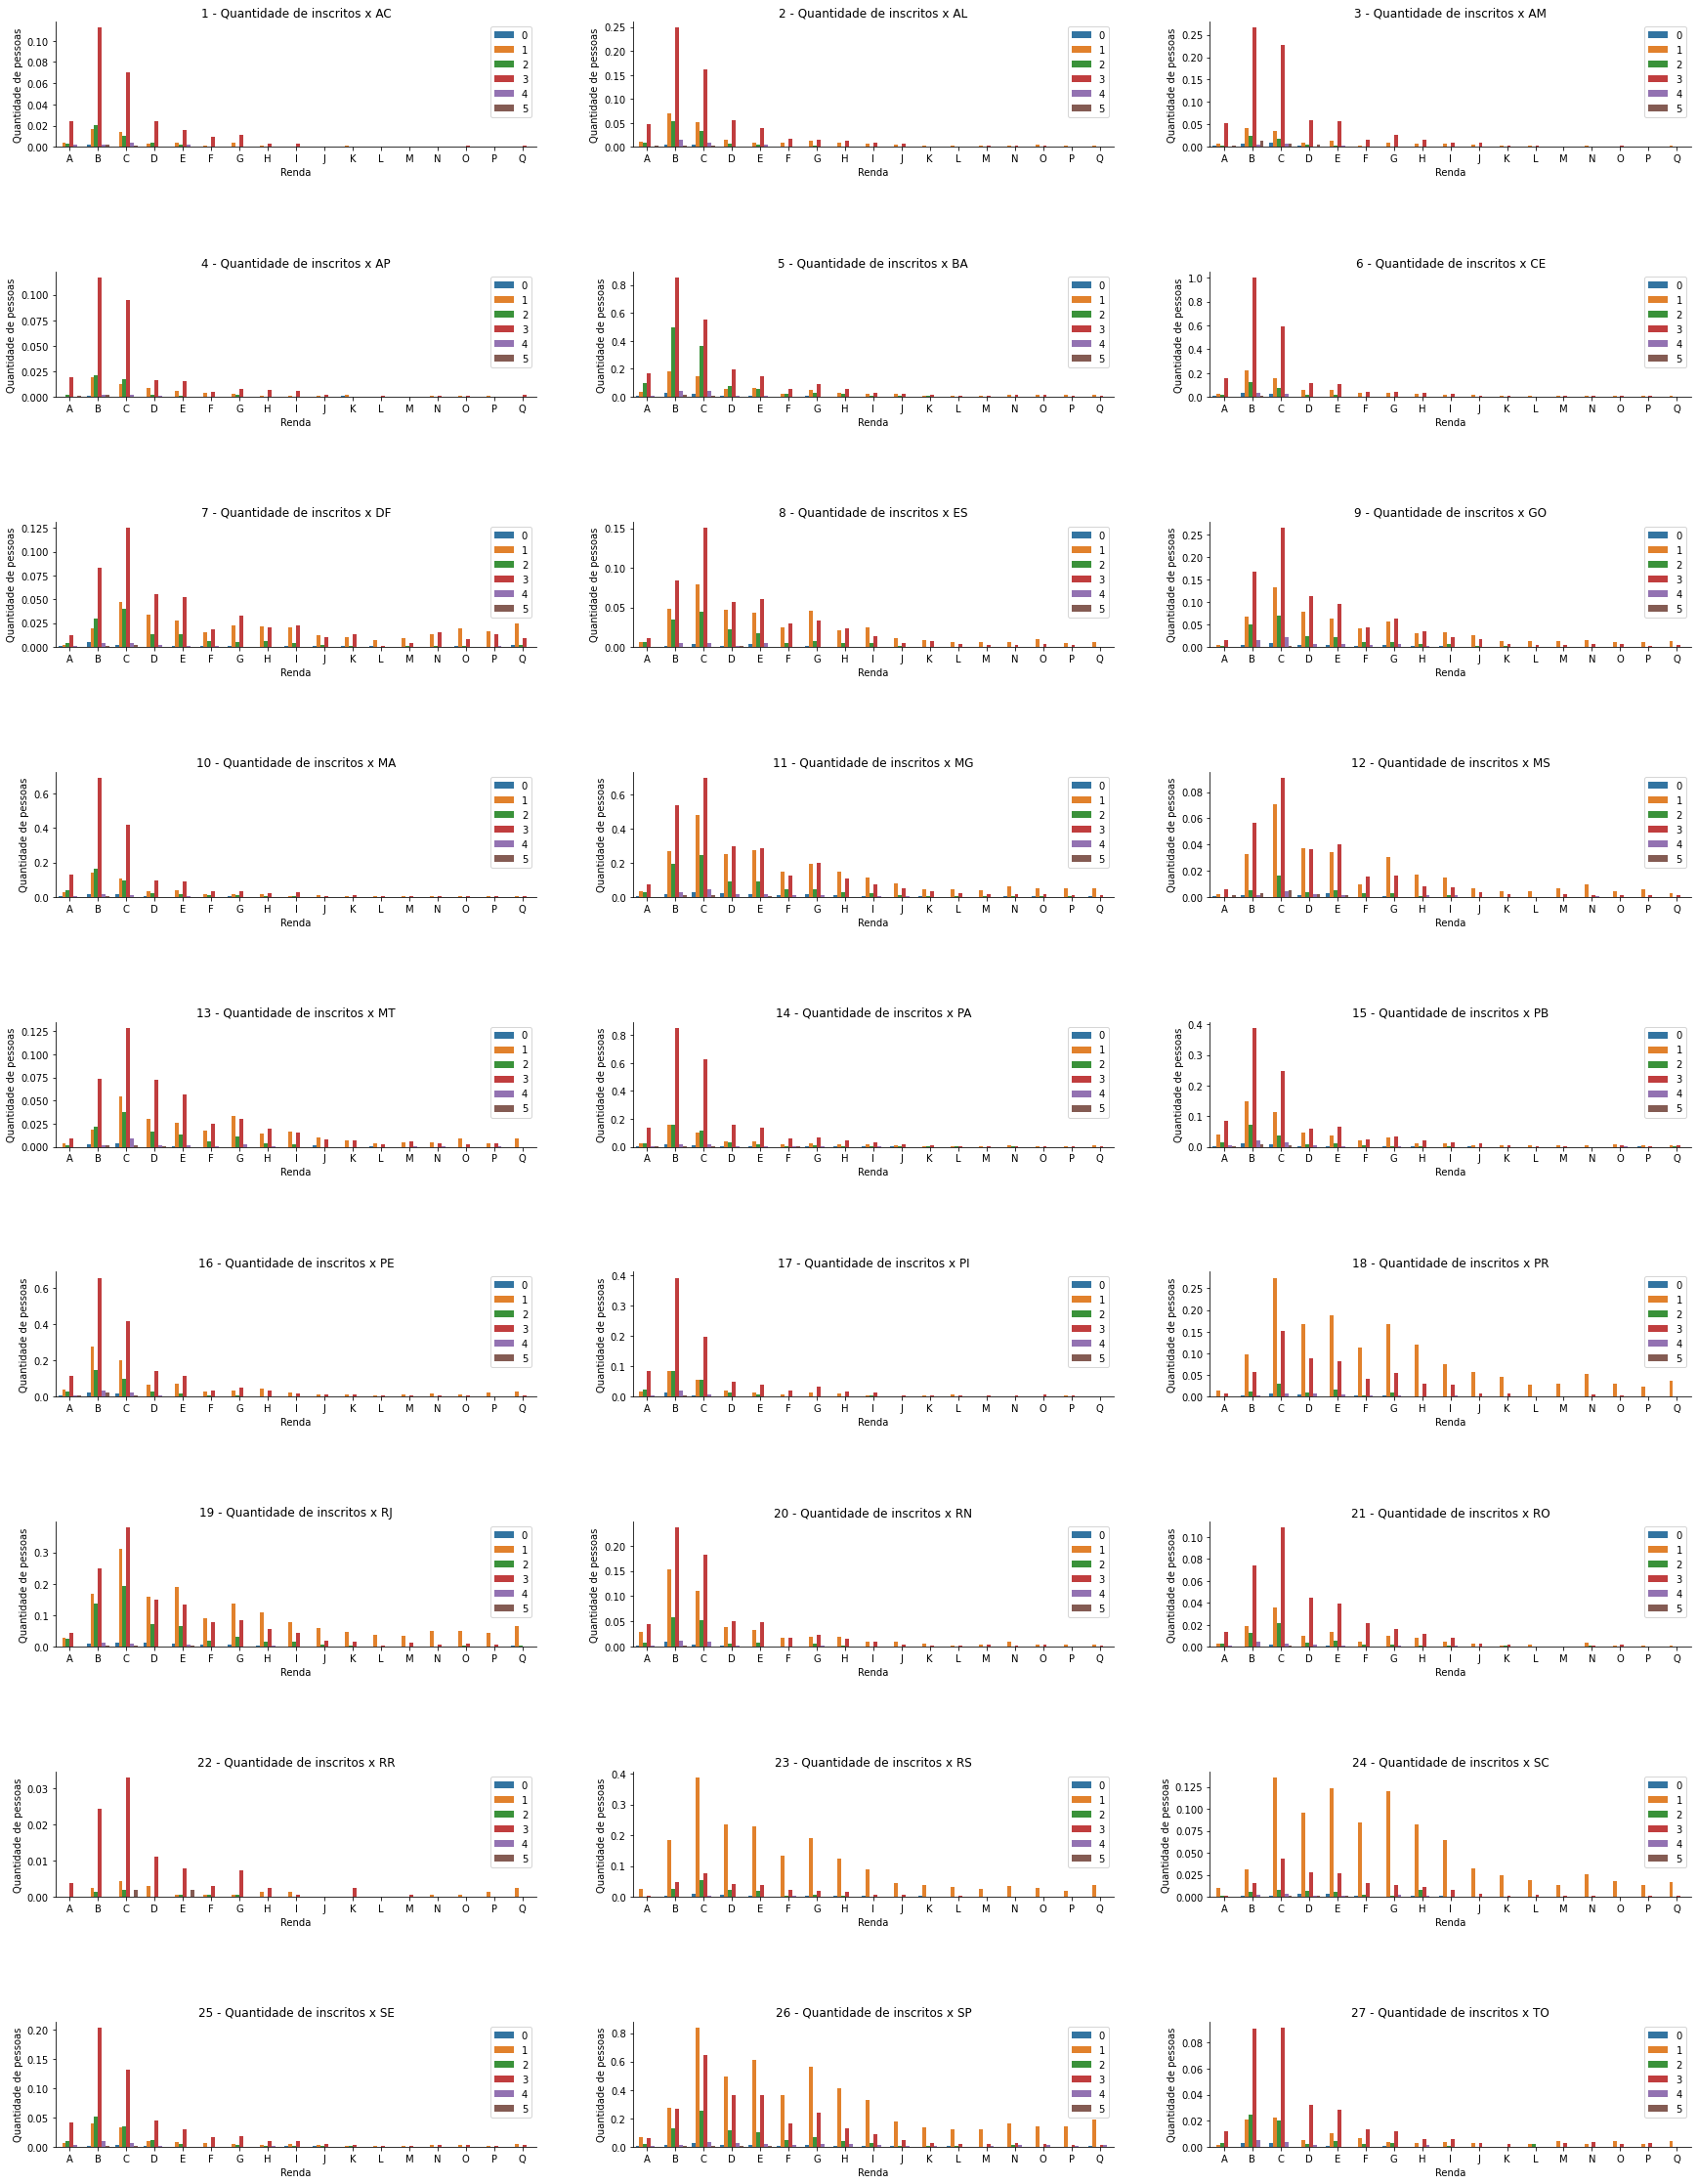

In [422]:
#Criação dos gráficos
row=0
fig, axes = plt.subplots(ncols=3, nrows=9, figsize=(30,40))
plt.subplots_adjust(hspace = 1)
for col, ii in enumerate(list(sorted(dfRendimentoPerCapita["Estado"]))): 
  mask = dfRacaRendaEstado.SG_UF_RESIDENCIA == ii
  sns.barplot(data=dfRacaRendaEstado[mask], x='Q006', y="NU_NOTA_TOTAL_NORM", hue="TP_COR_RACA", order=sorted(dadoCru.Q006.unique()), ax=axes[row%9,col%3]).legend(loc='upper right')
  axSettings(axes[row%9,col%3], "Renda", "Quantidade de pessoas", str(col+1)+" - Quantidade de inscritos x "+ii)
  if (col%3== 2): 
    row+=1

print("Legenda: 0 - Não declarado, 1 - Branca, 2 - Preta, 3 - Parda, 4 - Amarela, 5 - Indígena")

## Observações encontradas acima:
 
Com essas últimas análises fica ainda mais claro o papel da renda no resultado final dos candidatos, além do "branqueamento" dos estados mais ricos.
 
# 6. Conclusão dos resultados encontrados
 
Bem, de forma geral, analisando criticamente tudo que construímos até o momento, vemos o quão diverso é o Brasil de norte a sul. Infelizmente o conclusão que chegamos é algo já sabemos a muito tempo, nesse Brasil de contrastes fica escancarado o quanto a renda do país se concentra em alguns estados e principalmente em alguns grupos. Deixando de lado diversas minorias, marginalizadas e aquém do suporte necessário para uma mudança de vida. 
 
Com nossas observações entendemos porque os grupos denominados "brancos" alcançam os melhores resultados nas provas, já que esse grupo também detém a maior renda per capita. Constatamos também que os estados mais ricos também são mais "brancos" e consequentemente os com melhores resultados nas notas do ENEM.
 
Vimos também uma triste relação entre o sexo do participante e o desempenho na prova, e que por sua vez, também se relaciona com a renda. Quanto menor a renda familiar, maior as diferenças entre o desempenho dos participantes.
 
É triste ver que nosso país ainda possui uma herança preconceituosa e segregadora e que infelizmente as pessoas que mais sofrem com esse resultado são em sua maioria pobres ou não "brancas".
 
Porém esse trabalho pode nos servir de guia, acredito que mudanças são possíveis apenas após o entendimento do problema, então, um trabalho como esse se faz necessário para que possamos tomar consciência do que acontece à nossa volta e entendermos como podemos fazer a nossa parte para corrigir tantas desigualdades.


## Considerações finais.

Agradeço pela oportunidade de trabalhar nessa análise, confesso que comecei de maneira despretenciosa, mas fui mordido pela curiosidade de saber o que mais poderiamos concluir com os dados que temos acesso. Infelizmente tive alguns problemas para lidar com o dado completo e por alguma razão que desconheço, minhas legendas pararam de funcionar. Sempre que colocava uma legenda em algum gráfico(trocar os números pela descrição nominal) os valores perdiam as cores presentes do gráfico. 

Parabéns a Alura e sua equipe pelo trabalho, sempre que posso participo das imersões. 

Até a próxima. Um abraço do RN